Project Title: **House Price Prediction Using Linear Regression**

**Objective:**

The objective of this project is to build a machine learning regression model to predict house prices based on key property features. This notebook demonstrates the complete predictive analysis workflow, including feature selection, model training, and model evaluation.

Dataset Source: Kaggle – House Price Prediction Dataset

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Load Dataset**

In [2]:
#loading dataset from csv file
df = pd.read_csv('/content/Housing_price_prediction_dataset.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Understanding & Profiling**

In [3]:
#data size
df.shape

(545, 13)

The dataset consists of 545 rows and 13 columns.

In [4]:
#fetch all the columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
#data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


545 non-null values in all columns

In [6]:
#statistical summary of data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Average house price ≈ 4.7 million

Prices range from 1.75M to 13.3M

**Data Cleaning and Preprocessing**

In [7]:
#missing value check
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
#duplicate check
df.duplicated().sum()

np.int64(0)

In [9]:
#checking unique values of furnishing status
pd.unique(df['furnishingstatus'])

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
#categorizing categorical and numerical cols
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
numerical_cols = df.select_dtypes(exclude='object').columns
numerical_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [12]:
#encoding categorical cols through one-hot encoding method
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [13]:
#converting true/false to 0/1s
df_encoded = df_encoded.astype(int)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Categorical variables converted into numerical form using one-hot encoding.
The drop_first=True option is used to avoid multicollinearity.

In [14]:
#size of the dataset after encoding
df_encoded.shape

(545, 14)

After encoding, the dataset consists entirely of numerical features and is ready for feature selection and model training.

**Feature Selection & Target Variable**

In [15]:
#Target = Price
y = df_encoded['price']

In [16]:
#to ensure y is numeric
y = y.astype(float)

The target variable Price represents the house price that the model aims to predict.

In [17]:
#features
X = df_encoded.drop(['price'], axis=1)

The feature set includes all relevant property attributes excluding the target variable.
These features capture structural and location-related characteristics of houses.

In [18]:
#size of X and y
X.shape

(545, 13)

In [19]:
y.shape

(545,)

In [20]:
#columns in X
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

The feature matrix and target vector have matching row counts, confirming that the data is correctly aligned for model training.

**Train–Test Split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42)
#random_state Ensures reproducibility. Same split every time you run the notebook. Evaluators get the same results

In [22]:
#sizes after split
X_train.shape

(436, 13)

In [23]:
X_test.shape

(109, 13)

In [24]:
y_train.shape

(436,)

In [25]:
y_test.shape

(109,)

The dataset is successfully split into training and testing sets.
The training set is used for model learning, while the test set is reserved for evaluation.

**Feature Scaling**

In [26]:
#initializing the scalar
scaler = StandardScaler()

Since we have a varied scale of values like 5000 to 15000, scaling is imp. Scaling puts all features on a comparable scale.

In [27]:
#fit and transforing the train data
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler

array([[ 0.38416819,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [ 0.9291807 ,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027],
       [-0.60775457, -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  , -0.67690027],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.55262032,
        -0.870669  , -0.67690027],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.55262032,
        -0.870669  ,  1.47732249],
       [ 0.15707965,  0.05527092,  1.53917323, ..., -0.55262032,
         1.14854209, -0.67690027]])

Learns mean & std from training data. Scales training data using those values

In [28]:
#transforming the test data
X_test_scaler = scaler.transform(X_test)

test data is not fit and transform bcoz Test data must NOT influence scaling parameters

In [29]:
#size after scaling
X_train_scaler.shape

(436, 13)

In [30]:
X_test_scaler.shape

(109, 13)

Feature scaling is applied to ensure that features contribute equally to the model and improve training stability.

**Model Training**

In [31]:
#initializing the model
model = LinearRegression()

Linear reg is used coz our Target is continuous (Price) and Relationships are reasonably linear

In [32]:
#training the model
model.fit(X_train_scaler, y_train)

LinearRegression()

In [33]:
#validating creation of model
model

LinearRegression()

The Linear Regression model was trained using the scaled training dataset.
During training, the model learned the relationship between property features and house prices.

**Model Predictions**

In [34]:
#predicting target value based on scaled test feature
y_pred = model.predict(X_test_scaler)

In [35]:
#size of predicted target
y_pred.shape

(109,)

In [36]:
#show the first few predicted prices
y_pred[:5]

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725956])

The trained model was used to predict house prices for the test dataset.
These predictions will be compared with actual prices to evaluate model performance.

**Model Evaluation**

In [37]:
#mean absolute error: MAE represents the average difference between actual and predicted house prices.
mae = mean_absolute_error(y_test, y_pred)
mae

970043.4039201642

In [38]:
#mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

1754318687330.6677

In [39]:
#root mean squared error: RMSE indicates the typical prediction error while giving higher weight to large errors.
rmse = np.sqrt(mse)
rmse

np.float64(1324506.96009144)

In [40]:
#r2 score: R² Score shows how much of the variation in house prices is explained by the model.
r2_scores = r2_score(y_test, y_pred)
r2_scores

0.6529242642153177

In [41]:
#printing all the values:
print(f"Mean Absolute Error, MAE: {mae:.2f}")
print(f"Root Mean Squared Error, RMSE: {rmse:.2f}")
print(f"R2 Score: {r2_scores:.4f}")

Mean Absolute Error, MAE: 970043.40
Root Mean Squared Error, RMSE: 1324506.96
R2 Score: 0.6529


**Insights:**

The model’s R² score indicates that approximately 65% of the variation in house prices is explained by the selected features.

**Model Performance Visualizations**

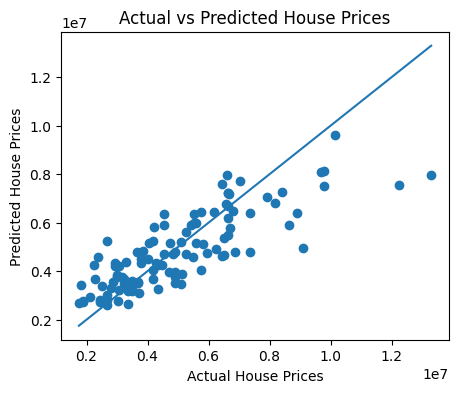

In [42]:
#Actual vs Predicted Price
plt.figure(figsize=(5, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

The Actual vs Predicted plot shows a strong alignment between predicted and actual house prices, with most points lying close to the diagonal line. This indicates that the model captures the overall pricing trend reasonably well, which is consistent with the obtained R² score.

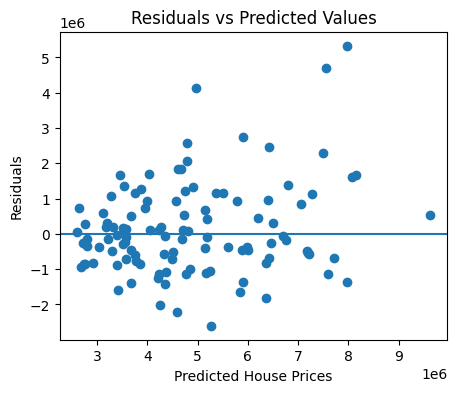

In [43]:
#Residuals vs Predicted Values
residuals = y_test - y_pred

plt.figure(figsize=(5, 4))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

The residuals are reasonably scattered around zero without a strong visible pattern. This suggests that the model does not suffer from major systematic errors and that prediction errors are fairly evenly distributed.

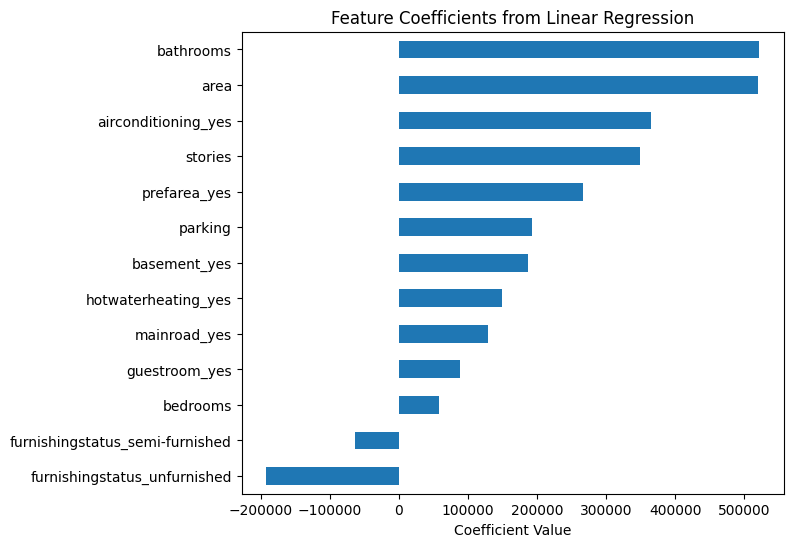

In [44]:
#Feature Coefficients Bar Plot
coefficients = pd.Series(
    model.coef_,
    index=X.columns
)

plt.figure(figsize=(7, 6))
coefficients.sort_values().plot(kind='barh')
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients from Linear Regression")
plt.show()


The feature coefficient plot highlights the relative influence of different property attributes on house prices. Features such as area, number of bathrooms, and air conditioning show a stronger positive impact, while other features contribute more moderately. This aligns with real-world expectations in housing markets.

**Results Interpretation**

The Linear Regression model was evaluated using MAE, RMSE, and R² score.

The Mean Absolute Error (MAE) of approximately 970,043 indicates that, on average, the model’s predictions differ from the actual house prices by about this amount.

The Root Mean Squared Error (RMSE) of approximately 1,324,506 represents the typical prediction error while giving higher weight to larger deviations.

The R² score of 0.6529 indicates that the model explains approximately 65% of the variation in house prices, and performs significantly better than a baseline model that predicts the mean house price.

Overall, these results suggest that the selected features have a meaningful relationship with house prices, and that linear regression is able to capture a substantial portion of the underlying patterns present in the dataset.

**Conclusion**

In this project, a machine learning regression model was developed to predict house prices using key property-related features. The complete predictive analysis workflow was implemented, including data understanding, preprocessing, feature selection, model training, and evaluation.

The Linear Regression model achieved reasonable predictive performance, explaining approximately 65% of the variation in house prices. This indicates that the selected features have a meaningful relationship with the target variable and that linear regression is effective for modeling this dataset.

Overall, the project demonstrates correct machine learning practices and provides a clear example of how regression techniques can be applied to real-world pricing problems. Future improvements could include incorporating additional market-specific features or exploring more advanced models to capture complex relationships.